In [0]:
#Kaggle link: https://www.kaggle.com/c/ashrae-energy-prediction
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [0]:
plt.rcParams["figure.figsize"] = (10,5)

In [0]:
#Reading weather train details
weather_train = pd.read_csv('/content/sample_data/weather_train.csv')
#Reading building meta details for all stores
building_meta = pd.read_csv('/content/sample_data/building_metadata.csv')
#Reading train details for all stores
train_meta = pd.read_csv('/content/sample_data/train.csv')

In [4]:
weather_train.shape

(139773, 9)

In [5]:
building_meta.shape

(1449, 6)

In [6]:
train_meta.shape

(20216100, 4)

In [7]:
weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [8]:
weather_train['site_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


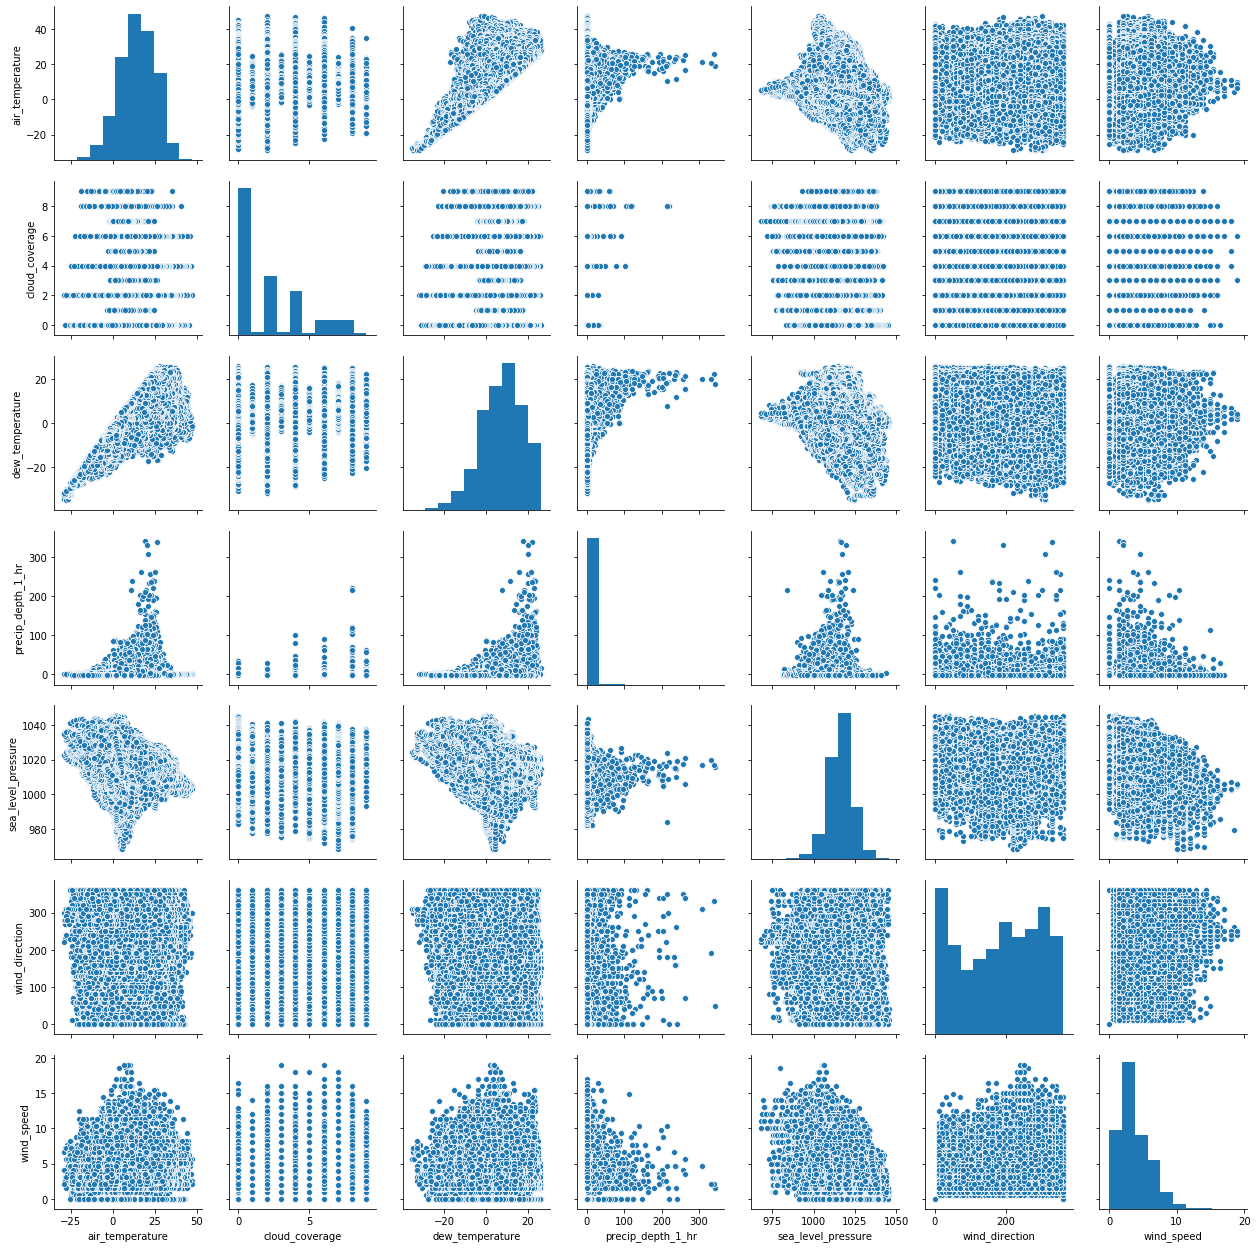

In [9]:
sns.pairplot(weather_train[['air_temperature','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_direction','wind_speed']])

In [10]:
building_meta.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [11]:
weather_train.isnull().sum()

site_id                   0
timestamp                 0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64

In [0]:
weather_train['timestamp'] = pd.to_datetime(weather_train['timestamp'])

In [13]:
weather_train['timestamp']

0        2016-01-01 00:00:00
1        2016-01-01 01:00:00
2        2016-01-01 02:00:00
3        2016-01-01 03:00:00
4        2016-01-01 04:00:00
                 ...        
139768   2016-12-31 19:00:00
139769   2016-12-31 20:00:00
139770   2016-12-31 21:00:00
139771   2016-12-31 22:00:00
139772   2016-12-31 23:00:00
Name: timestamp, Length: 139773, dtype: datetime64[ns]

In [0]:
for site in weather_train['site_id'].unique():
  #site_weather = weather_train[weather_train['site_id'] == site]
  weather_train[weather_train['site_id'] == site] = weather_train[weather_train['site_id'] == site].interpolate(method="linear")

In [0]:
weather_train_interpolated = pd.DataFrame([])

In [0]:
startDate = pd.to_datetime("2016-01-01 00:00:00")
endDate = pd.to_datetime("2016-12-31 23:00:00")

In [0]:
for site in weather_train['site_id'].unique():
  site_weather = weather_train[weather_train['site_id'] == site]
  site_weather = site_weather.set_index('timestamp')
  site_weather_reindexed = site_weather.resample("1H")
  #new_index = pd.date_range(startDate,endDate,freq="1H")
  #site_weather_reindexed = site_weather.reindex(new_index)
  site_weather_reindexed = site_weather_reindexed.interpolate(method="linear")
  weather_train_interpolated = weather_train_interpolated.append(site_weather_reindexed)

In [18]:
weather_train_interpolated.head()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,
2016-01-01 00:00:00,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01 01:00:00,0.0,24.4,4.0,21.1,-1.0,1020.2,70.0,1.5
2016-01-01 02:00:00,0.0,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
2016-01-01 03:00:00,0.0,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
2016-01-01 04:00:00,0.0,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [19]:
weather_train_interpolated.shape

(140537, 8)

In [0]:
weather_train_interpolated = weather_train_interpolated.reset_index()

In [21]:
weather_train_interpolated.shape

(140537, 9)

In [22]:
weather_train_interpolated.isnull().sum()

timestamp                 0
site_id                   0
air_temperature           0
cloud_coverage        17606
dew_temperature           0
precip_depth_1_hr     26568
sea_level_pressure     8970
wind_direction            0
wind_speed                0
dtype: int64

In [0]:
#Filling missing values for sea_level_pressure with mean and precip_depth_1_hr, cloud_coverage with mode
weather_train_interpolated.loc[(weather_train_interpolated['sea_level_pressure'].isnull()), 'sea_level_pressure'] = weather_train_interpolated['sea_level_pressure'].mean()
weather_train_interpolated.loc[(weather_train_interpolated['precip_depth_1_hr'].isnull()), 'precip_depth_1_hr'] = 0.0
weather_train_interpolated.loc[(weather_train_interpolated['cloud_coverage'].isnull()), 'cloud_coverage'] = 0.0

In [24]:
weather_train_interpolated.isnull().sum()

timestamp             0
site_id               0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

In [25]:
building_meta.isnull().sum()

site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64

In [26]:
building_meta.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [0]:
building_meta.loc[(building_meta['floor_count'].isnull()), 'floor_count'] = 1
building_meta.loc[(building_meta['year_built'].isnull()), 'year_built'] = 1976.0

In [28]:
building_meta.isnull().sum()

site_id        0
building_id    0
primary_use    0
square_feet    0
year_built     0
floor_count    0
dtype: int64

In [0]:
#Creating new feature called total area based on floor count and square feet
building_meta['total_area'] = building_meta['floor_count'] * building_meta['square_feet']

In [30]:
building_meta.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,total_area
0,0,0,Education,7432,2008.0,1.0,7432.0
1,0,1,Education,2720,2004.0,1.0,2720.0
2,0,2,Education,5376,1991.0,1.0,5376.0
3,0,3,Education,23685,2002.0,1.0,23685.0
4,0,4,Education,116607,1975.0,1.0,116607.0


In [0]:
#Dropping square feet and floor count column
building_meta.drop(columns=['square_feet','floor_count'],inplace=True)

In [32]:
building_meta.head()

,site_id,building_id,primary_use,year_built,total_area
0,0,0,Education,2008.0,7432.0
1,0,1,Education,2004.0,2720.0
2,0,2,Education,1991.0,5376.0
3,0,3,Education,2002.0,23685.0
4,0,4,Education,1975.0,116607.0


In [33]:
#Merging weather and building meta dataset based on site id
merged = pd.merge(weather_train_interpolated, building_meta, on='site_id')
merged.head()

,timestamp,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,building_id,primary_use,year_built,total_area
0,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,0,Education,2008.0,7432.0
1,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,1,Education,2004.0,2720.0
2,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,2,Education,1991.0,5376.0
3,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,3,Education,2002.0,23685.0
4,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,4,Education,1975.0,116607.0


In [34]:
merged.shape

(12727412, 13)

In [0]:
#Reading train details for all stores
train_meta = pd.read_csv('/content/sample_data/train.csv')

In [36]:
train_meta.shape

(20216100, 4)

In [37]:
train_meta.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [38]:
train_meta.dtypes

building_id        int64
meter              int64
timestamp         object
meter_reading    float64
dtype: object

In [0]:
site_zero_buildings = building_meta[building_meta['site_id'] == 0]['building_id'].values.flatten().tolist()

In [0]:
kbtu_conversion_factor = 0.293071

In [0]:
#Converting kbu to kwh for site id 0 and electric meter

In [0]:
train_meta.loc[(train_meta['building_id'].isin(site_zero_buildings)) & (train_meta['meter'] == 0),'meter_reading'] = train_meta.loc[(train_meta['building_id'].isin(site_zero_buildings)) & (train_meta['meter'] == 0),'meter_reading']*kbtu_conversion_factor

In [0]:
train_meta['timestamp'] = pd.to_datetime(train_meta['timestamp'])

In [44]:
train_meta.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


In [0]:
train = pd.merge(merged, train_meta, on=['building_id','timestamp'])

In [46]:
train.head()

,timestamp,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,building_id,primary_use,year_built,total_area,meter,meter_reading
0,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,0,Education,2008.0,7432.0,0,0.0
1,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,1,Education,2004.0,2720.0,0,0.0
2,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,2,Education,1991.0,5376.0,0,0.0
3,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,3,Education,2002.0,23685.0,0,0.0
4,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,4,Education,1975.0,116607.0,0,0.0


In [47]:
train.shape

(20214986, 15)

In [48]:
train.isnull().sum()

timestamp             0
site_id               0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
building_id           0
primary_use           0
year_built            0
total_area            0
meter                 0
meter_reading         0
dtype: int64

**Exploratory Data Analysis and Feature Engineering**

In [0]:
train_copy_before_eda = train.copy()

In [0]:
train['weekday'] = train['timestamp'].dt.weekday

In [0]:
train['weekday'] = train['weekday'].isin([0,1,2,3,4])

In [52]:
train.groupby(['weekday']).mean()['meter_reading']

weekday
False    1836.555712
True     2219.847618
Name: meter_reading, dtype: float64

In [53]:
train['weekday'].unique()

array([ True, False])

In [54]:
train.head()

,timestamp,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,building_id,primary_use,year_built,total_area,meter,meter_reading,weekday
0,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,0,Education,2008.0,7432.0,0,0.0,True
1,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,1,Education,2004.0,2720.0,0,0.0,True
2,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,2,Education,1991.0,5376.0,0,0.0,True
3,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,3,Education,2002.0,23685.0,0,0.0,True
4,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,4,Education,1975.0,116607.0,0,0.0,True


In [0]:
#Extracting hour from timestamp
train['hour'] = train['timestamp'].dt.hour

In [0]:
#Extracting month from timestamp
train['month'] = train['timestamp'].dt.month

In [57]:
train.head()

,timestamp,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,building_id,primary_use,year_built,total_area,meter,meter_reading,weekday,hour,month
0,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,0,Education,2008.0,7432.0,0,0.0,True,0,1
1,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,1,Education,2004.0,2720.0,0,0.0,True,0,1
2,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,2,Education,1991.0,5376.0,0,0.0,True,0,1
3,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,3,Education,2002.0,23685.0,0,0.0,True,0,1
4,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,4,Education,1975.0,116607.0,0,0.0,True,0,1


In [0]:
#Extracting year from timestamp
train['year'] = train['timestamp'].dt.year

In [0]:
#Creating new feature called building age based on this previous year and the year which building was build
train['building_age'] = train['year'] - train['year_built']

In [60]:
train.head()

,timestamp,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,building_id,primary_use,year_built,total_area,meter,meter_reading,weekday,hour,month,year,building_age
0,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,0,Education,2008.0,7432.0,0,0.0,True,0,1,2016,8.0
1,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,1,Education,2004.0,2720.0,0,0.0,True,0,1,2016,12.0
2,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,2,Education,1991.0,5376.0,0,0.0,True,0,1,2016,25.0
3,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,3,Education,2002.0,23685.0,0,0.0,True,0,1,2016,14.0
4,2016-01-01,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,4,Education,1975.0,116607.0,0,0.0,True,0,1,2016,41.0


In [0]:
#Drop unwanted columns related to year
#train = train.drop(columns=['timestamp', 'year_built', 'year'])
del train['timestamp']
del train['year_built']
del train['year']

In [62]:
train.head()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,building_id,primary_use,total_area,meter,meter_reading,weekday,hour,month,building_age
0,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,0,Education,7432.0,0,0.0,True,0,1,8.0
1,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,1,Education,2720.0,0,0.0,True,0,1,12.0
2,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,2,Education,5376.0,0,0.0,True,0,1,25.0
3,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,3,Education,23685.0,0,0.0,True,0,1,14.0
4,0.0,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,4,Education,116607.0,0,0.0,True,0,1,41.0


**Data Normalization**

In [63]:
train['air_temperature'].skew()

-0.3680286501753251

In [64]:
#air_temperature
from sklearn.preprocessing import MinMaxScaler
at_scaler = MinMaxScaler()
train['air_temperatureNorm'] = at_scaler.fit_transform(train[['air_temperature']])
train['air_temperatureNorm'].skew()

-0.36802865017537445

In [65]:
from sklearn.preprocessing import StandardScaler
at_stdscaler = StandardScaler()
train['air_temperatureNorm'] = at_stdscaler.fit_transform(train[['air_temperature']])
train['air_temperatureNorm'].skew()

-0.36802865017533753

In [66]:
from sklearn.preprocessing import PowerTransformer
at_pt = PowerTransformer(method='yeo-johnson')
train['air_temperatureNorm'] = at_pt.fit_transform(train[['air_temperature']])
train['air_temperatureNorm'].skew()

-0.157786731101419

In [67]:
train['air_temperature'] = at_pt.fit_transform(train[['air_temperature']])
train['air_temperature'].skew()

-0.157786731101419

In [68]:
train['cloud_coverage'].skew()

0.6537732667187655

In [69]:
cc_scaler = MinMaxScaler()
train['cloud_coverageNorm'] = cc_scaler.fit_transform(train[['cloud_coverage']])
train['cloud_coverageNorm'].skew()

0.6537732667187657

In [70]:
cc_stdscaler = StandardScaler()
train['cloud_coverageNorm'] = cc_stdscaler.fit_transform(train[['cloud_coverage']])
train['cloud_coverageNorm'].skew()

0.6537732667187582

In [71]:
cc_pt = PowerTransformer(method='yeo-johnson')
train['cloud_coverageNorm'] = cc_pt.fit_transform(train[['cloud_coverage']])
train['cloud_coverageNorm'].skew()

-0.003063192331881072

In [72]:
train['dew_temperature'].skew()

-0.4315345810264039

In [73]:
dew_scaler = MinMaxScaler()
train['dew_temperatureNorm'] = dew_scaler.fit_transform(train[['dew_temperature']])
print(train['dew_temperatureNorm'].skew())
dew_stdscaler = StandardScaler()
train['dew_temperatureNorm'] = dew_stdscaler.fit_transform(train[['dew_temperature']])
print(train['dew_temperatureNorm'].skew())
dew_pt = PowerTransformer(method='yeo-johnson')
train['dew_temperatureNorm'] = dew_pt.fit_transform(train[['dew_temperature']])
print(train['dew_temperatureNorm'].skew())

-0.43153458102641423
-0.4315345810264035
-0.22318298826786487


In [0]:
train['dew_temperature'] = dew_pt.fit_transform(train[['dew_temperature']])

In [75]:
train['precip_depth_1_hr'].skew()

15.146544130304346

In [76]:
pre_scaler = MinMaxScaler()
train['precip_depth_1_hrNorm'] = pre_scaler.fit_transform(train[['precip_depth_1_hr']])
print(train['precip_depth_1_hrNorm'].skew())
pre_stdscaler = StandardScaler()
train['precip_depth_1_hrNorm'] = pre_stdscaler.fit_transform(train[['precip_depth_1_hr']])
print(train['precip_depth_1_hrNorm'].skew())
pre_pt = PowerTransformer(method='yeo-johnson')
train['precip_depth_1_hrNorm'] = pre_pt.fit_transform(train[['precip_depth_1_hr']])
print(train['precip_depth_1_hrNorm'].skew())

15.146544130304536
15.14654413030424
-0.6175721025625449


In [0]:
train['precip_depth_1_hr'] = pre_pt.fit_transform(train[['precip_depth_1_hr']])

In [78]:
train['sea_level_pressure'].skew()

-0.11014650605300402

In [79]:
train['wind_speed'].skew()

0.8181013271061328

In [80]:
ws_scaler = MinMaxScaler()
train['wind_speedNorm'] = ws_scaler.fit_transform(train[['wind_speed']])
print(train['wind_speedNorm'].skew())
ws_stdscaler = StandardScaler()
train['wind_speedNorm'] = ws_stdscaler.fit_transform(train[['wind_speed']])
print(train['wind_speedNorm'].skew())
ws_pt = PowerTransformer(method='yeo-johnson')
train['wind_speedNorm'] = ws_pt.fit_transform(train[['wind_speed']])
print(train['wind_speedNorm'].skew())

0.8181013271061262
0.8181013271061274
-0.021589397737114744


In [0]:
train['wind_speed'] = ws_pt.fit_transform(train[['wind_speed']])

In [82]:
train['total_area'].skew()

11.75127240019725

In [83]:
ta_scaler = MinMaxScaler()
train['total_areaNorm'] = ta_scaler.fit_transform(train[['total_area']])
print(train['total_areaNorm'].skew())
ta_stdscaler = StandardScaler()
train['total_areaNorm'] = ta_stdscaler.fit_transform(train[['total_area']])
print(train['total_areaNorm'].skew())
ta_pt = PowerTransformer(method='yeo-johnson')
train['total_areaNorm'] = ta_pt.fit_transform(train[['total_area']])
print(train['total_areaNorm'].skew())

11.751272400197228
11.751272400197273
0.01975998552611655


In [0]:
train['total_area'] = ta_pt.fit_transform(train[['total_area']])

In [85]:
train['building_age'].skew()

1.2921816101177743

In [86]:
ba_scaler = MinMaxScaler()
train['building_ageNorm'] = ba_scaler.fit_transform(train[['building_age']])
print(train['building_ageNorm'].skew())
ba_stdscaler = StandardScaler()
train['building_ageNorm'] = ba_stdscaler.fit_transform(train[['building_age']])
print(train['building_ageNorm'].skew())
ba_pt = PowerTransformer(method='yeo-johnson')
train['building_ageNorm'] = ba_pt.fit_transform(train[['building_age']])
print(train['building_ageNorm'].skew())

1.292181610117837
1.292181610117946
0.2433437012713325


In [0]:
train['building_age'] = ba_pt.fit_transform(train[['building_age']])

In [88]:
train['meter_reading'].skew()

104.80841592426174

In [89]:
mr_scaler = MinMaxScaler()
train['meter_readingNorm'] = mr_scaler.fit_transform(train[['meter_reading']])
print(train['meter_readingNorm'].skew())
mr_stdscaler = StandardScaler()
train['meter_readingNorm'] = mr_stdscaler.fit_transform(train[['meter_reading']])
print(train['meter_readingNorm'].skew())
mr_pt = PowerTransformer(method='yeo-johnson')
train['meter_readingNorm'] = mr_pt.fit_transform(train[['meter_reading']])
print(train['meter_readingNorm'].skew())

104.80841592426171
104.80841592426212
0.0025712834495805813


In [0]:
train['meter_reading'] = mr_pt.fit_transform(train[['meter_reading']])

In [91]:
train.head()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,building_id,primary_use,total_area,meter,meter_reading,weekday,hour,month,building_age,air_temperatureNorm,cloud_coverageNorm,dew_temperatureNorm,precip_depth_1_hrNorm,wind_speedNorm,total_areaNorm,building_ageNorm,meter_readingNorm
0,0.0,0.834089,6.0,1.249691,0.067746,1019.7,0.0,-1.847361,0,Education,-1.691510,0,-1.825863,True,0,1,-2.177341,0.834089,1.151061,1.249691,0.067746,-1.847361,-1.691510,-2.177341,-1.825863
1,0.0,0.834089,6.0,1.249691,0.067746,1019.7,0.0,-1.847361,1,Education,-2.384460,0,-1.825863,True,0,1,-1.837914,0.834089,1.151061,1.249691,0.067746,-1.847361,-2.384460,-1.837914,-1.825863
2,0.0,0.834089,6.0,1.249691,0.067746,1019.7,0.0,-1.847361,2,Education,-1.916981,0,-1.825863,True,0,1,-0.933660,0.834089,1.151061,1.249691,0.067746,-1.847361,-1.916981,-0.933660,-1.825863
3,0.0,0.834089,6.0,1.249691,0.067746,1019.7,0.0,-1.847361,3,Education,-0.867037,0,-1.825863,True,0,1,-1.682631,0.834089,1.151061,1.249691,0.067746,-1.847361,-0.867037,-1.682631,-1.825863
4,0.0,0.834089,6.0,1.249691,0.067746,1019.7,0.0,-1.847361,4,Education,0.312806,0,-1.825863,True,0,1,-0.026442,0.834089,1.151061,1.249691,0.067746,-1.847361,0.312806,-0.026442,-1.825863


In [0]:
#Dropping normalized columns and id columns
#del train['site_id']
del train['building_id']
del train['air_temperatureNorm']
del train['cloud_coverageNorm']
del train['dew_temperatureNorm']
del train['precip_depth_1_hrNorm']
del train['wind_speedNorm']
del train['total_areaNorm']
del train['building_ageNorm']
del train['meter_readingNorm']

In [93]:
train.head()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,primary_use,total_area,meter,meter_reading,weekday,hour,month,building_age
0,0.0,0.834089,6.0,1.249691,0.067746,1019.7,0.0,-1.847361,Education,-1.691510,0,-1.825863,True,0,1,-2.177341
1,0.0,0.834089,6.0,1.249691,0.067746,1019.7,0.0,-1.847361,Education,-2.384460,0,-1.825863,True,0,1,-1.837914
2,0.0,0.834089,6.0,1.249691,0.067746,1019.7,0.0,-1.847361,Education,-1.916981,0,-1.825863,True,0,1,-0.933660
3,0.0,0.834089,6.0,1.249691,0.067746,1019.7,0.0,-1.847361,Education,-0.867037,0,-1.825863,True,0,1,-1.682631
4,0.0,0.834089,6.0,1.249691,0.067746,1019.7,0.0,-1.847361,Education,0.312806,0,-1.825863,True,0,1,-0.026442


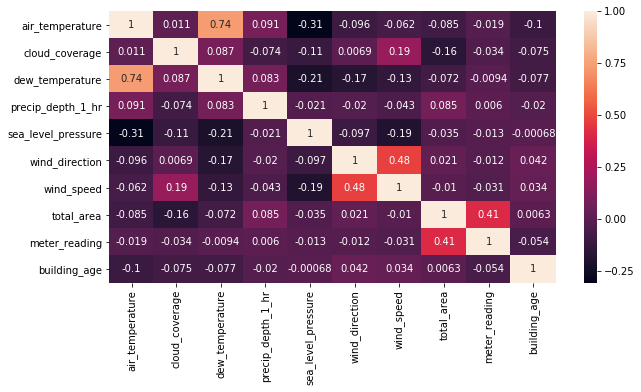

In [94]:
#Checking correlation between numerical columns
numeric_columns = ['air_temperature','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_direction','wind_speed','total_area','meter_reading','building_age']
corr = train[numeric_columns].corr()
sns.heatmap(corr, annot=True)

In [95]:
train.head()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,primary_use,total_area,meter,meter_reading,weekday,hour,month,building_age
0,0.0,0.834089,6.0,1.249691,0.067746,1019.7,0.0,-1.847361,Education,-1.691510,0,-1.825863,True,0,1,-2.177341
1,0.0,0.834089,6.0,1.249691,0.067746,1019.7,0.0,-1.847361,Education,-2.384460,0,-1.825863,True,0,1,-1.837914
2,0.0,0.834089,6.0,1.249691,0.067746,1019.7,0.0,-1.847361,Education,-1.916981,0,-1.825863,True,0,1,-0.933660
3,0.0,0.834089,6.0,1.249691,0.067746,1019.7,0.0,-1.847361,Education,-0.867037,0,-1.825863,True,0,1,-1.682631
4,0.0,0.834089,6.0,1.249691,0.067746,1019.7,0.0,-1.847361,Education,0.312806,0,-1.825863,True,0,1,-0.026442


In [0]:
train = pd.get_dummies(train, columns=['primary_use'])

In [97]:
train.shape

(20214986, 31)

In [98]:
train.head()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,total_area,meter,meter_reading,weekday,hour,month,building_age,primary_use_Education,primary_use_Entertainment/public assembly,primary_use_Food sales and service,primary_use_Healthcare,primary_use_Lodging/residential,primary_use_Manufacturing/industrial,primary_use_Office,primary_use_Other,primary_use_Parking,primary_use_Public services,primary_use_Religious worship,primary_use_Retail,primary_use_Services,primary_use_Technology/science,primary_use_Utility,primary_use_Warehouse/storage
0,0.0,0.834089,6.0,1.249691,0.067746,1019.7,0.0,-1.847361,-1.691510,0,-1.825863,True,0,1,-2.177341,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.834089,6.0,1.249691,0.067746,1019.7,0.0,-1.847361,-2.384460,0,-1.825863,True,0,1,-1.837914,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.834089,6.0,1.249691,0.067746,1019.7,0.0,-1.847361,-1.916981,0,-1.825863,True,0,1,-0.933660,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.834089,6.0,1.249691,0.067746,1019.7,0.0,-1.847361,-0.867037,0,-1.825863,True,0,1,-1.682631,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.834089,6.0,1.249691,0.067746,1019.7,0.0,-1.847361,0.312806,0,-1.825863,True,0,1,-0.026442,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
target = train['meter_reading']
del train['meter_reading']


In [100]:
train.shape

(20214986, 30)

In [101]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.05, random_state=9)
print(X_train.shape)
print(X_test.shape)

(19204236, 30)
(1010750, 30)


In [0]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
del X_train_copy['site_id']
del X_test_copy['site_id']

In [0]:
#RMSE
from sklearn.metrics import mean_squared_error
def rmse(expected, predicted):
    return np.sqrt(mean_squared_error(expected, predicted))

**2. Linear Regression**

In [104]:
#Training
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_copy, y_train)
r2score = lr.score(X_train_copy, y_train)
train_pred = lr.predict(X_train_copy)
print('R2score:', r2score, 'RMSE:', rmse(y_train, train_pred))

R2score: 0.19312113587354085 RMSE: 0.8982266405717464


In [0]:
def rmsle(expected, predicted):
   return np.sqrt(np.mean(np.square(np.log(predicted + 1) - np.log(expected + 1))))

In [106]:
rmsle(y_train, train_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.6878630304153379

In [107]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test_copy)
from sklearn.metrics import mean_squared_error
print('R2score:', r2_score(y_test, y_pred), 'RMSE:', rmse(y_test, y_pred))

R2score: 0.19380566579528946 RMSE: 0.8985986429342852


In [109]:
rmsle(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.6882717772870027